In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [3]:
df = pd.read_csv('laptop_price_dataset.csv')

In [4]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [5]:
df.shape

(1275, 15)

In [6]:
df.isna().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [7]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [9]:
print(f'duplicated values: {df.duplicated().sum().item()}')

duplicated values: 0


In [10]:
df.describe(include='all')

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
count,1275,1275,1275,1275.000000,1275,1275,1275,1275.000000,1275.000000,1275,1275,1275,1275,1275.000000,1275.000000
unique,19,618,6,NaN,40,3,93,NaN,NaN,39,4,106,9,NaN,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel,Core i5 7200U,NaN,NaN,256GB SSD,Intel,HD Graphics 620,Windows 10,NaN,NaN
freq,291,30,707,NaN,505,1214,193,NaN,NaN,412,704,280,1048,NaN,NaN
mean,NaN,NaN,NaN,15.022902,NaN,NaN,NaN,2.302980,8.440784,NaN,NaN,NaN,NaN,2.040525,1134.969059
std,NaN,NaN,NaN,1.429470,NaN,NaN,NaN,0.503846,5.097809,NaN,NaN,NaN,NaN,0.669196,700.752504
min,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,0.900000,2.000000,NaN,NaN,NaN,NaN,0.690000,174.000000
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,NaN,NaN,1.500000,609.000000
50%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,2.500000,8.000000,NaN,NaN,NaN,NaN,2.040000,989.000000
75%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,2.700000,8.000000,NaN,NaN,NaN,NaN,2.310000,1496.500000


In [11]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'CPU_Company',
       'CPU_Type', 'Memory', 'GPU_Company', 'GPU_Type', 'OpSys'],
      dtype='object')

In [12]:
numerical_cols = df.select_dtypes(include=['number']).columns

In [13]:
numerical_cols

Index(['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)',
       'Price (Euro)'],
      dtype='object')

In [14]:
numerical_data = df[['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)',
       'Price (Euro)']]

In [15]:
numerical_data.head()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
0,13.3,2.3,8,1.37,1339.69
1,13.3,1.8,8,1.34,898.94
2,15.6,2.5,8,1.86,575.00
3,15.4,2.7,16,1.83,2537.45
4,13.3,3.1,8,1.37,1803.60


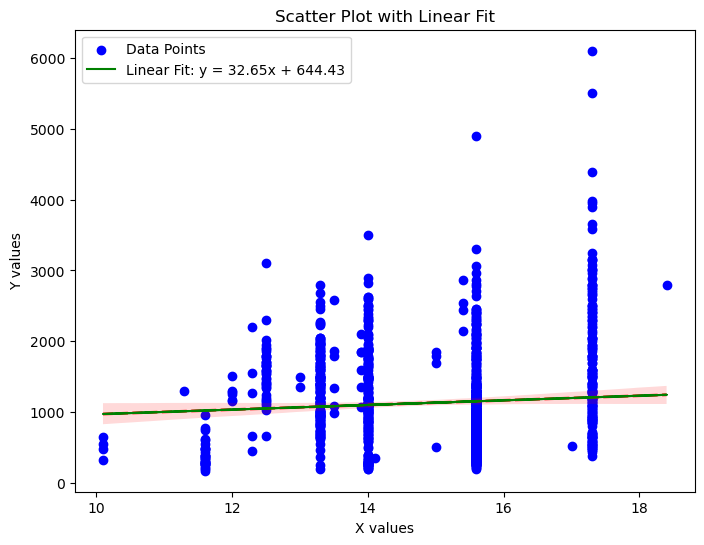

In [31]:
import scipy.stats as stats
import seaborn as sns


x = df['Inches']
y = df['Price (Euro)']

# Step 4: Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data Points', color='blue')

# Step 5: Fit a linear regression line
sns.regplot(x=x, y=y, scatter=False, color='red', line_kws={'linestyle': '--', 'linewidth': 2})

# Optionally: Fit a line manually using scipy's linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, slope * x + intercept, color='green', label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}')

# Step 6: Add labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot with Linear Fit')
plt.legend()

# Step 7: Display the plot
plt.show()

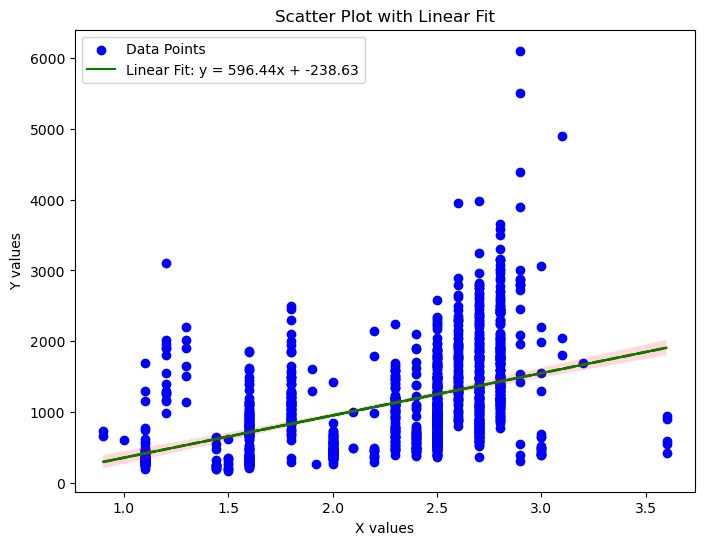

In [32]:
x = df['CPU_Frequency (GHz)']
y = df['Price (Euro)']

# Step 4: Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data Points', color='blue')

# Step 5: Fit a linear regression line
sns.regplot(x=x, y=y, scatter=False, color='red', line_kws={'linestyle': '--', 'linewidth': 2})

# Optionally: Fit a line manually using scipy's linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, slope * x + intercept, color='green', label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}')

# Step 6: Add labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot with Linear Fit')
plt.legend()

# Step 7: Display the plot
plt.show()

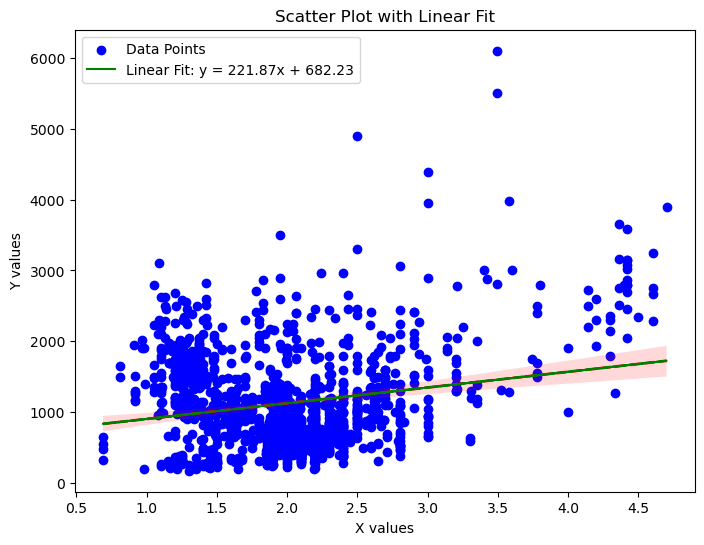

In [33]:
x = df['Weight (kg)']
y = df['Price (Euro)']

# Step 4: Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data Points', color='blue')

# Step 5: Fit a linear regression line
sns.regplot(x=x, y=y, scatter=False, color='red', line_kws={'linestyle': '--', 'linewidth': 2})

# Optionally: Fit a line manually using scipy's linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, slope * x + intercept, color='green', label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}')

# Step 6: Add labels and title
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot with Linear Fit')
plt.legend()

# Step 7: Display the plot
plt.show()